https://rosettacode.org/wiki/Euler_method

This notebook is about Chapter 8 "Plasticity and Learning" in Dayan and Abbott.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

$v$ is the activity of the post-synaptic neuron, $u$ is the input pattern and $w$ is the synaptic weight.
$$v=w\cdot u$$
$$\tau\frac{dw}{dt}=v\cdot u$$

Let's use deconvolved calcium data from real neurons https://figshare.com/articles/Recording_of_19_000_neurons_across_mouse_visual_cortex_during_sparse_noise_stimuli/9505250 as input patterns to an artificial neuron $v$. We select the firing patterns of 1000 neurons as input patterns. 

In [3]:
dat=np.load('/media/maria/DATA1/Documents/data_for_dayan_notebook/spks.npy')
random_neurons=np.random.randint(0,18795,1000)
print(random_neurons.shape)
input_patterns=dat[random_neurons,:]
del dat

(1000,)


In [69]:
print(input_patterns.shape)

(1000, 30766)


In [17]:
#one timestep with random gaussian weights without plasticity
weights=np.random.normal(loc=0,size=(1000,))
v=np.dot(weights,input_patterns[:,1])
print(v)

204.06541270264358


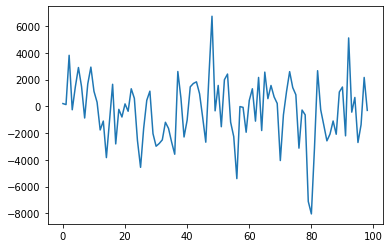

In [21]:
#multiple time steps with random gaussian weights without plasticity
v_lst=[]
for j in range(1,100):
    v_lst.append(np.dot(weights,input_patterns[:,j]))
plt.plot(v_lst)

(1000, 498)


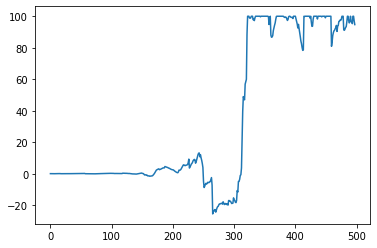

In [6]:
#Using Euler's method to calculate the weight increments
h=0.001
input_patterns=zscore(input_patterns,axis=1)
v_lst=[]
w_lst=[]
w=np.random.normal(loc=0,size=(1000,))
v_lst=[np.dot(w,input_patterns[:,1])]
for j in range(2,500):
    v_lst.append(np.dot(w,input_patterns[:,j]))
    w=w+h*v_lst[-1]*input_patterns[:,j]
    w=np.clip(w,a_min=-100,a_max=100)
    w_lst.append(w)
w_arr=np.array(w_lst).T
print(w_arr.shape)
plt.plot(w_arr[0,:])

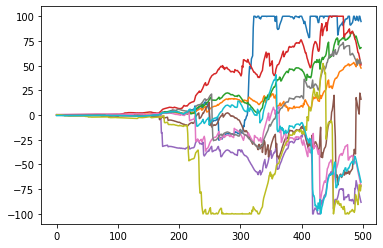

In [7]:
for j in range(0,10):
    plt.plot(w_arr[j,:])

In [62]:
print(v_lst)

[-19.3124009630457, -77.93542148744956, -110.6164996794167, -78.71200840899608, -141.85839081239763, -203.21961897170962, -187.1244936101823, -287.13533387841744, -275.3404974854045, -249.2436052447154, -279.78684481031235, -369.71709907543004, -443.57294894426417, -426.61850017950485, -268.0948719350614, -362.8141273439245, -350.04698062881766, -289.01437747125493, -617.3431746797635, -526.5798377361987, -292.82568181051465, -65.13593263843637, -89.64372140099485, 16.607102536578616, -57.06342420532768, -100.86489613790769, -264.9881317195881, -248.84663337120526, -267.0174249195405, -130.38339748805225, -388.78450485739955, -290.4778359373881, -295.3956007764118, -215.38912420355632, -427.54039696131525, -913.9396693649692, -789.9105293031284, -274.77833165881833, -608.7063534901354, -916.138942874613, -825.0819947837861, -317.6088461022246, -759.434758160409, -379.42351721276896, -246.45804653204547, -331.5036711218655, -66.52302928642843, -64.27353724819034, -434.6845448935432, -43

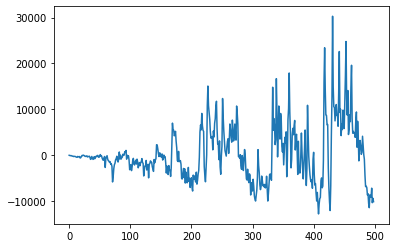

In [63]:
plt.plot(v_lst)

(1000, 2)


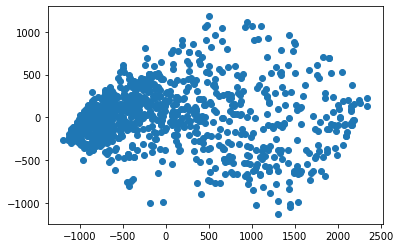

In [80]:
#Take PCA of the weights matrix
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X=pca.fit_transform(w_arr)

print(X.shape)

plt.scatter(X[:,0],X[:,1])

# Inputs with Gaussian statistics

(1000, 498)


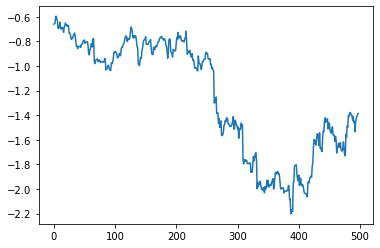

In [10]:
#Using Euler's method to calculate the weight increments
h=0.001
input_patterns=np.random.normal(0,1,(1000,500))
v_lst=[]
w_lst=[]
w=np.random.normal(loc=0,size=(1000,))
v_lst=[np.dot(w,input_patterns[:,1])]
for j in range(2,500):
    v_lst.append(np.dot(w,input_patterns[:,j]))
    w=w+h*v_lst[-1]*input_patterns[:,j]
    w=np.clip(w,a_min=-100,a_max=100)
    w_lst.append(w)
w_arr=np.array(w_lst).T
print(w_arr.shape)
plt.plot(w_arr[0,:])

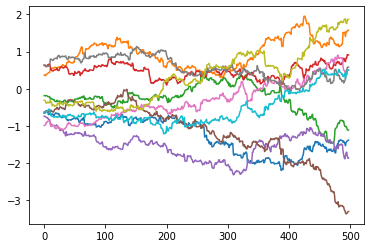

In [11]:
for j in range(0,10):
    plt.plot(w_arr[j,:])

(1000, 2)


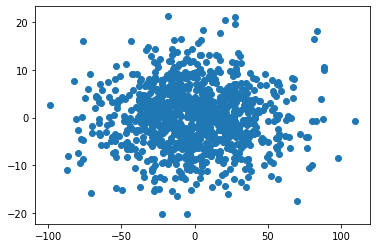

In [12]:
#Take PCA of the weights matrix
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X=pca.fit_transform(w_arr)

print(X.shape)

plt.scatter(X[:,0],X[:,1])